# Predicting House Price in Bengaluru

## Problem Statement
>What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

In [58]:
#importing the Library
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings   # To ignore any warnings
warnings.filterwarnings("ignore")

print("Setup Complete")


Setup Complete


In [59]:
# Reading the training dataset using Pandas
train = pd.read_csv("Predicting House Prices in Bengaluru/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

# Reading the testing dataset using Pandas
test = pd.read_csv("Predicting House Prices in Bengaluru/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Variable Description

|   Variable   |                                Descriptions                                |
|:------------:|:--------------------------------------------------------------------------:|
| area_type    | describe the area                                                          |
| availability | when it can be possessed or  when it is ready(categorical and time-series) |
| location     | where it is located in Bengaluru                                           |
| price        | Value of the property in lakhs(INR)                                        |
| size         | in BHK or Bedroom (1-10 or more)                                           |
| society      | to which society it belongs                                                |
| total_sqft   | size of the property in sq.ft                                              |
| bath         | No. of bathrooms                                                           |
| balcony      | No. of the balcony                                                         |

### 3. ***Data Preprocessing***

#### 3.1. Preprocessing `total_sqft`

In [61]:
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [62]:
train['total_sqft'] = train.total_sqft.str.split('-').apply(preprocess_total_sqft)

#### 3.2. Preprocessing `size`

In [63]:
def replace_size(string):
    if string == '1 RK':
        return 0
    elif string == '1 BHK' or string == '1 Bedroom':
        return 1
    elif string == '2 BHK' or string == '2 Bedroom':
        return 2
    elif string == '3 BHK' or string == '3 Bedroom':
        return 3
    elif string == '4 BHK' or string == '4 Bedroom':
        return 4
    elif string == '5 BHK' or string == '5 Bedroom':
        return 5
    elif string == '6 BHK' or string == '6 Bedroom':
        return 6
    elif string == '7 BHK' or string == '7 Bedroom':
        return 7
    elif string == '8 BHK' or string == '8 Bedroom':
        return 8
    elif string == '9 BHK' or string == '9 Bedroom':
        return 9
    elif string == '10 BHK' or string == '10 Bedroom':
        return 10
    elif string == '11 BHK' or string == '11 Bedroom':
        return 11
    elif string == '12 BHK' or string == '12 Bedroom':
        return 12
    elif string == '13 BHK' or string =='13 Bedroom':
        return 13
    elif string == '14 BHK' or string =='14 Bedroom':
        return 14
    elif string == '16 BHK' or string =='16 Bedroom':
        return 16
    elif string == '18 BHK' or string =='18 Bedroom':
        return 18
    elif string == '19 BHK' or string =='19 Bedroom':
        return 19
    elif string == '27 BHK' or string =='27 Bedroom':
        return 27
    elif string == '43 BHK' or string =='43 Bedroom':
        return 43

In [64]:
train['size'] = train['size'].apply(replace_size)

#### 3.3. Preprocessing `area_type`

##### 3.3.1 Label Encoding


In [65]:
from sklearn.preprocessing import LabelEncoder

area_encoder = LabelEncoder()
train['area_type'] = area_encoder.fit_transform(train['area_type'])

#### 3.4. Preprocessing `availability`

In [66]:
def replace_availability(string):
    if string == 'Ready To Move':
        return 0
    elif string == 'Immediate Possession':
        return 1
    else:
        return 2

In [67]:
train['availability'] = train['availability'].apply(replace_availability)

#### 3.5. Preprocessing `location`

In [80]:

train['location'] = train['location'].fillna('Location not provided')

location_encoder = LabelEncoder()
location_encoder.fit(train['location'].astype('str').append(test['location']))
train['location'] = location_encoder.transform(train['location'].astype('str'))

#### 3.6. Preprocessing `society`

In [86]:
train['society'] = train['society'].fillna('Other')
society_encoder = LabelEncoder()
society_encoder.fit(train['society'].astype('str'))
train['society'] = society_encoder.transform(train['society'].astype('str'))

#### 3.5. Missing Value Treatment

In [70]:
train['size'].fillna(train['size'].mode()[0], inplace = True)


train['location'].fillna(0, inplace = True)


train['bath'].fillna(train['bath'].mode()[0], inplace = True)


column_balcony = train.groupby('location')['balcony'].transform(lambda x: x.fillna(x.mode()))
train['balcony'] = column_balcony.fillna(column_balcony.mode())

In [71]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,2,419,2.0,464,1056.0,2.0,1.0,39.07
1,2,0,317,4.0,2440,2600.0,5.0,3.0,120.00
2,0,0,1180,3.0,1447,1440.0,2.0,3.0,62.00
3,3,0,757,3.0,2187,1521.0,3.0,1.0,95.00
4,3,0,716,2.0,1447,1200.0,2.0,1.0,51.00


### 3. Exploratory Data Analysis

#### 3.1. ***Univariate Analysis***

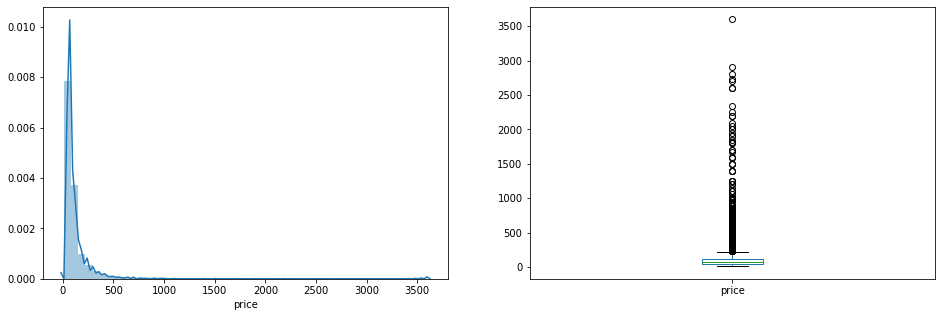

In [72]:
# We will look at the target variable i.e. "price"

plt.figure(1)

plt.subplot(121)
sns.distplot(train['price'])

plt.subplot(122)
train['price'].plot(kind='box', figsize = (16,5))

plt.show()

It can inferred that most of the data in the distribution of `price` is towards left which means it is not normally distributed. 


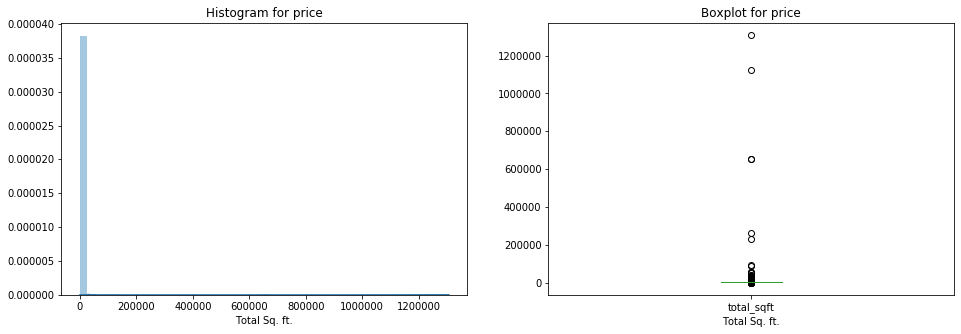

In [73]:
# We will look at the target variable i.e. "price"

plt.figure(1)

plt.subplot(121)
sns.distplot(train['total_sqft'])
plt.xlabel('Total Sq. ft.')
plt.title('Histogram for price')

plt.subplot(122)
train['total_sqft'].plot(kind='box', figsize = (16,5))
plt.xlabel('Total Sq. ft.')
plt.title('Boxplot for price')

plt.show()

Text(0, 0.5, 'Area Type')

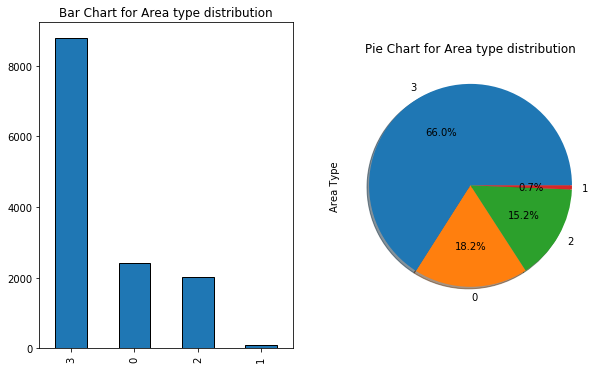

In [74]:
# Lets visualise the area_type independent variable

plt.figure(1)

plt.subplot(121)
train['area_type'].value_counts().plot(kind = 'bar', figsize = (10, 6),
                                            edgecolor = 'black')
plt.title('Bar Chart for Area type distribution')


plt.subplot(122)
train['area_type'].value_counts().plot(kind = 'pie', figsize = (10,6),
                                                autopct = '%1.1f%%',
                                                shadow = True)
plt.title('Pie Chart for Area type distribution')
plt.ylabel('Area Type')

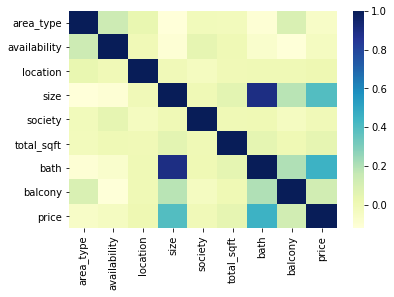

In [75]:
#Lets create the correlation heatmap
corr = train.corr()

sns.heatmap(corr, cmap="YlGnBu")

In [76]:
X = train.drop('price', axis = 1)
y = train['price']

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [78]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import  mean_absolute_error

xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
       n_estimators=1000, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
error = mean_absolute_error(y_test, predict)
print(error)


30.79076467363684


In [87]:
test['total_sqft'] = test.total_sqft.str.split('-').apply(preprocess_total_sqft)

train['size'] = train['size'].apply(replace_size)

test['area_type'] = area_encoder.transform(test['area_type'])

test['availability'] = test['availability'].apply(replace_availability)

test['location'] = location_encoder.transform(test['location'].astype('str'))

test['society'] = society_encoder.transform(test['society'])

test['bath'].fillna(test['bath'].mode()[0], inplace = True)

test['balcony'] = column_balcony.fillna(column_balcony.mode())

test.drop('price', axis = 1, inplace = True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas